<a href="https://colab.research.google.com/github/dsacademybr/Datasets/blob/master/Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><b><font size="5">Data Science Academy</font></b></strong>

<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Aula 4</font></b></strong>

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade em nosso portal: www.datascienceacademy.com.br

Vamos começar as aulas práticas sobre análise e modelagem de séries temporais. Nossa primeira tarefa será decompor uma série temporal e identificar seus componentes, conforme definimos nas primeiras aulas o curso.

Primeiro, uma rápida revisão:

## Séries Temporais

- Uma série temporal é um conjunto sequencial de pontos de dados, medido tipicamente em tempos sucessivos.

- É matematicamente definido como um conjunto de vetores x(t), t = 0,1,2, ... onde t representa o tempo decorrido.

- A variável x(t) é tratada como uma variável aleatória.

- As medições realizadas durante um evento em uma série temporal são organizadas em uma ordem cronológica adequada.

- Uma série temporal contendo registros de uma única variável é denominada como univariada e mais de uma variável como multivariada.

### Análise Exploratória

Uma análise exploratória dos dados permite compreender como os dados estão organizados.

In [0]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [0]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [0]:
# A nova versão do Pandas traz diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Imports para manipulação de dados
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [0]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

pandas          1.0.3
matplotlib      3.2.0
statsmodels.api 0.11.1
seaborn         0.10.0
Data Science Academy


Vamos carregar um dataset com uma série temporal.

O dataset é público e pode ser encontrado aqui:

https://www.kaggle.com/rakannimer/air-passengers

O conjunto de dados AirPassenger fornece totais mensais de passageiros de uma companhia aérea dos EUA, de 1949 a 1960. Esse conjunto de dados já é de uma classe de série temporal, portanto, nenhuma manipulação adicional de classe ou data é necessária.

In [0]:
# Carrega os dados
dados = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset1.csv?token=AEOSZHZE2TWJREXOOYKXJO26P2LJM', header = None)

In [0]:
# Visualizando os Dados
dados.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Perceba que são duas colunas. Esses dados representam uma série univariada, pois temos uma variável aleatória x (número de passageiros) e a data, que representa o índice da série.

Vamos ajustar o nome de cada coluna.

In [0]:
# Ajustando o nome de cada coluna
dados.columns = ['mes','passageiros']

In [0]:
# Visualizando os Dados
dados.head()

,mes,passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
# Resumo estatístico da variável passageiros. A média é de 280 passageiros.
dados.describe()

,passageiros
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [0]:
# Qual será o mês com maior número de passageiros? Dezembro de 1960 teve 622 passageiros.
dados.max()

mes            1960-12
passageiros        622
dtype: object

In [0]:
# Vamos coletar o período completo da série temporal
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(dados.mes.min(), dados.mes.max()))

Início do Período de Tempo: 1949-01
Final do Período de Tempo: 1960-12


In [0]:
# Shape dos Dados
dados.shape

(144, 2)

In [0]:
# Tipos dos Dados
dados.dtypes

mes            object
passageiros     int64
dtype: object

Observe que a coluna de data está como tipo object, que é a representação de string. Teremos que ajustar isso.

In [0]:
# Tipo do objeto
type(dados)

pandas.core.frame.DataFrame

### Processamento e Visualização dos Dados

Vamos converter a data do tipo object (string) para o tipo apropriado, datetime, pois assim podemos usar métodos e atributos específicos de datas.

In [0]:
# Convertendo a coluna data de object para datetime  
dados['mes'] = pd.to_datetime(dados['mes'], format = '%Y-%m')

In [0]:
# Tipos dos Dados
dados.dtypes

mes            datetime64[ns]
passageiros             int64
dtype: object

In [0]:
# Visualizando os Dados
dados.head()

,mes,passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [0]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('mes')

In [0]:
# Visualizando os Dados
dados_serie.head()

,passageiros
mes,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Agora sim podemos chamar esse conjunto de dados de série temporal. Vamos visualizar o índice:

In [0]:
# Visualizando o índice
dados_serie.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='mes', length=144, freq=None)

In [0]:
# Será que algum valor nulo está presente nos dados?
dados_serie.isnull().sum()

passageiros    0
dtype: int64

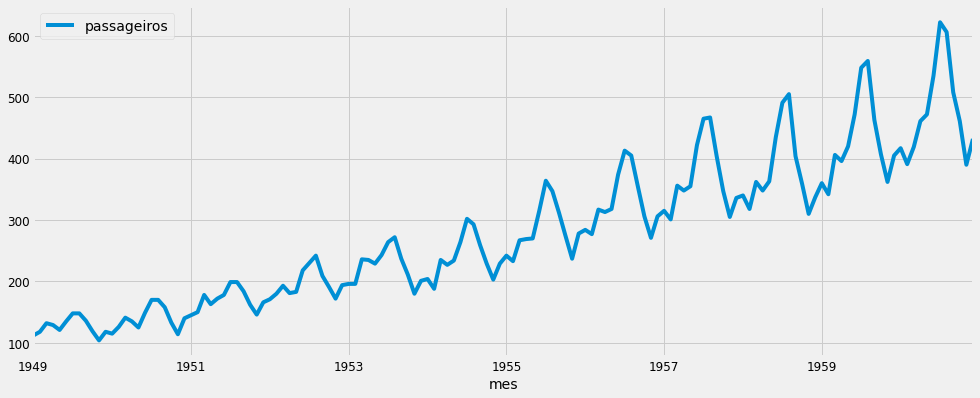

In [0]:
# Plot da série temporal
dados_serie.plot(figsize = (15, 6))
plt.show()

Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. Vamos criar o gráfico: 

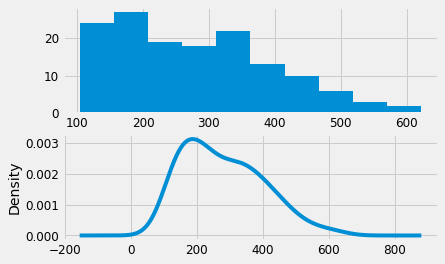

In [0]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados_serie.passageiros.hist()

# Subplot 2
plt.subplot(212)
dados_serie.passageiros.plot(kind = 'kde')
plt.show()

Análise:
    
- A distribuição não é perfeitamente gaussiana (distribuição normal).
- A distribuição está inclinada para a esquerda.
- As transformações podem ser úteis antes da modelagem.

Vamos agora criar Box Plots para cada ano da série.

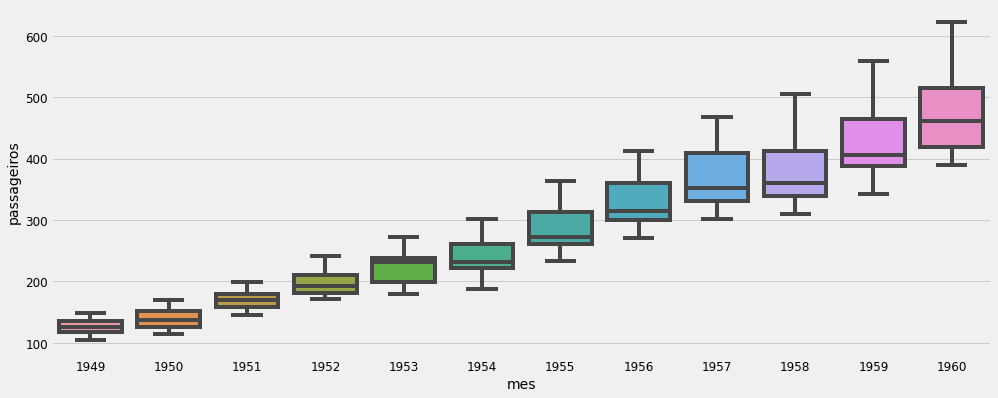

In [0]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize=(15,6))

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(dados_serie.passageiros.index.year, dados_serie.passageiros, ax = ax)

Análise:

- Valores medianos ao longo dos anos confirmam uma tendência ascendente.
- Aumento constante da dispersão do meio (mediana) dos dados ao longo do tempo. As caixas vão se tornando cada vez maiores.
- Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

Descomposição da Série Temporal

- Podemos usar os modelos estatísticos para realizar uma decomposição dessa série cronológica.
- A decomposição de séries temporais é uma tarefa estatística que desconstrói uma série temporal em vários componentes, cada um representando uma das categorias de padrões.
- Com os modelos de estatísticas, poderemos ver a tendência, os componentes sazonais e residuais de nossos dados.

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

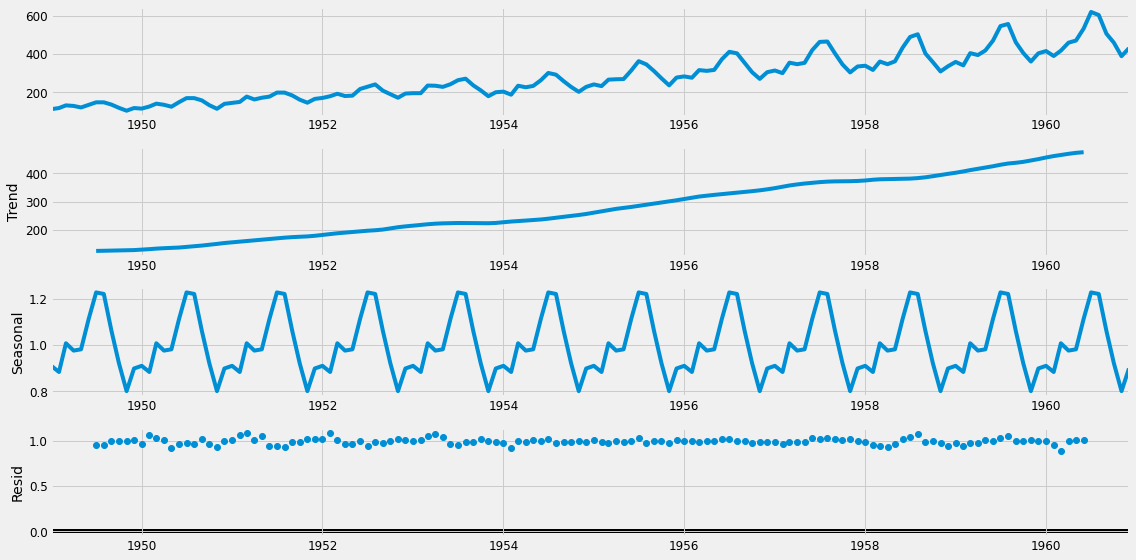

In [0]:
decomposicao = sm.tsa.seasonal_decompose(dados_serie, model = 'multiplicative')
fig = decomposicao.plot()
plt.show()

No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados, em nosso exemplo o número de passageiros.

2- A segunda linha mostra a tendência do gráfico, que claramente é uma tendência de crescimento, ou seja, o númeto de passageiros tende a crescer ao longo do tempo.

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda, momentos em que temos mais passageiros e momentos com menos passageiros nas viagens aéreas. Isso talvez possa ser explicado pelo aumento das viagens no período de férias, o que se repete ano após ano.

4- A quarta linha é o componete irregular ou resíduo.

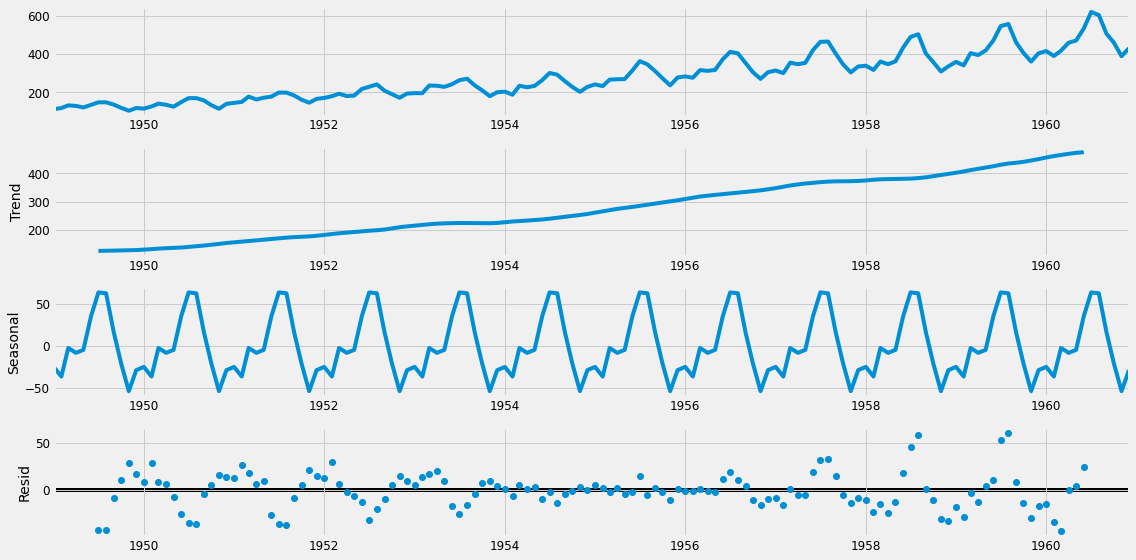

In [0]:
decomposicao = sm.tsa.seasonal_decompose(dados_serie, model = 'aditive')
fig = decomposicao.plot()
plt.show()

# Fim Aula 4